Linear Regression

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [99]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense = Offense.replace(np.nan, 0)
Offense.head()

Rk  Year           Player Pos    AV       School        College  Height  \
0   1  2000    Bashir Yamini  WR   0.0         Iowa  College Stats    75.0   
1   2  2000     Spergon Wynn  QB   2.0  Texas State  College Stats    75.0   
2   3  2000   James Williams  WR   4.0     Marshall  College Stats    71.0   
3   4  2000  Bobbie Williams  OT  64.0     Arkansas              0    76.0   
4   5  2000    Michael Wiley  RB   4.0   Ohio State  College Stats    71.0   

    Wt  40YD  Vertical  BenchReps  Broad Jump  3Cone  Shuttle  \
0  191  4.53      33.0        0.0       130.0   7.09     4.18   
1  229  4.91      34.0        0.0       108.0   7.71     4.59   
2  180  4.59      36.0        0.0       123.0   7.22     4.16   
3  332  5.26      29.0       28.0        97.0   7.78     4.72   
4  193  4.50       0.0        0.0         0.0   0.00     0.00   

                Drafted  Round  
0                     0    0.0  
1     Cleveland Browns     6.0  
2     Seattle Seahawks     6.0  
3  Philadelphia Eagles     2.0  
4       Dallas Cowboys     5.0

In [100]:
X = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Offense["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2910, 8) (2910, 1)


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [103]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.009079549123833464
Testing Score: 0.0063697320087848786


Text(0.5, 1.0, 'Residual Plot')

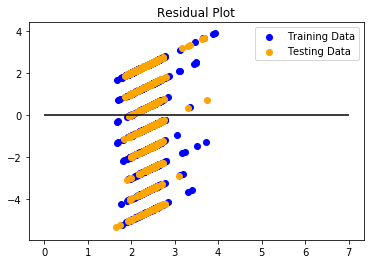

In [104]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [105]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [106]:
model = LinearRegression()

In [107]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.938464006778113
R-squared (R2 ): 0.009697566734504948


In [109]:
model.score(X, y)

0.009697566734504948

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
model.score(X_test, y_test)

0.0063697320087848786

Logical Regression


In [113]:
XOffense = Offense.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted"])

In [114]:
X = XOffense
y = Offense["Round"]
print(X.shape, y.shape)

(2910, 9) (2910,)


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [116]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8001833180568286
Testing Data Score: 0.7760989010989011


In [119]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0. 3. 0. 7. 0. 5. 0. 0. 0. 0.]
First 10 Actual labels: [0.0, 2.0, 0.0, 7.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]


In [120]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

Prediction  Actual
0           0.0     0.0
1           3.0     2.0
2           0.0     0.0
3           7.0     7.0
4           0.0     0.0
5           5.0     5.0
6           0.0     0.0
7           0.0     0.0
8           0.0     0.0
9           0.0     0.0
10          2.0     2.0
11          7.0     7.0
12          2.0     3.0
13          7.0     7.0
14          6.0     6.0
15          1.0     1.0
16          0.0     0.0
17          5.0     5.0
18          3.0     3.0
19          0.0     0.0
20          6.0     6.0
21          2.0     1.0
22          2.0     2.0
23          4.0     5.0
24          6.0     6.0
25          7.0     7.0
26          4.0     5.0
27          4.0     5.0
28          3.0     3.0
29          0.0     0.0
..          ...     ...
698         0.0     0.0
699         3.0     2.0
700         0.0     0.0
701         0.0     0.0
702         0.0     0.0
703         4.0     5.0
704         0.0     0.0
705         7.0     7.0
706         1.0     2.0
707         0.0     0.0
708         7.0     7.0
709         0.0     0.0
710         0.0     0.0
711         4.0     3.0
712         1.0     2.0
713         0.0     0.0
714         7.0     7.0
715         0.0     0.0
716         0.0     0.0
717         3.0     2.0
718         0.0     0.0
719         6.0     6.0
720         4.0     3.0
721         0.0     0.0
722         1.0     1.0
723         4.0     4.0
724         0.0     0.0
725         6.0     5.0
726         4.0     3.0
727         0.0     0.0

[728 rows x 2 columns]